About Dataset: Kaggle: https://www.kaggle.com/datasets/mokar2001/house-price-tehran-iran  
Context
I was trying to find a house for myself and I decide to collect many houses detail on an Iranian website with their updated price and this is the final data which is a kind of house pricing prediction.

Content
There is some information about each house:  

Area in square meters  
Number of bedrooms  
Has Parking or not  
Has elevator or not  
Has warehouse or not  
The region where the house is placed  
Price in Toman and USD  
Notes  
Every USD is equal to 30,000 Tomans (Extra Info).  
Take care about outliers & noises.  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import re
import time
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb

In [2]:
df = pd.read_csv('house_prices.csv')

In [3]:
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3479 non-null   object 
 1   Room        3479 non-null   int64  
 2   Parking     3479 non-null   bool   
 3   Warehouse   3479 non-null   bool   
 4   Elevator    3479 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3479 non-null   float64
 7   Price(USD)  3479 non-null   float64
dtypes: bool(3), float64(2), int64(1), object(2)
memory usage: 146.2+ KB


In [5]:
df.columns

Index(['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Address', 'Price',
       'Price(USD)'],
      dtype='object')

Verificação se há dados duplicados no meu dataframe. No caso, há 208 dados duplicados.

In [6]:
df.duplicated().sum()

208

Visualizando os dados duplicados.

In [7]:
duplicated = df[df.duplicated()]
duplicated

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
55,61,1,True,True,False,Punak,2.030000e+09,67666.67
78,74,2,True,True,True,Amirieh,1.700000e+09,56666.67
79,88,3,False,False,True,Parand,5.600000e+08,18666.67
80,63,1,True,True,True,Punak,2.150000e+09,71666.67
81,114,3,True,True,True,Sattarkhan,5.500000e+09,183333.33
...,...,...,...,...,...,...,...,...
3449,80,2,True,True,True,Punak,3.760000e+09,125333.33
3451,88,2,True,True,True,Central Janatabad,4.000000e+09,133333.33
3459,80,2,True,True,True,Ostad Moein,2.250000e+09,75000.00
3461,55,1,True,True,True,Punak,2.300000e+09,76666.67


In [8]:
df.drop_duplicates(inplace = True)

Checagem dos dados do dataframe.

In [9]:
df.duplicated().sum()

0

In [10]:
df.drop('Price', axis = 1, inplace = True)

In [11]:
df

,Area,Room,Parking,Warehouse,Elevator,Address,Price(USD)
0,63,1,True,True,True,Shahran,61666.67
1,60,1,True,True,True,Shahran,61666.67
2,79,2,True,True,True,Pardis,18333.33
3,95,2,True,True,True,Shahrake Qods,30083.33
4,123,2,True,True,True,Shahrake Gharb,233333.33
...,...,...,...,...,...,...,...
3473,63,1,True,True,False,Feiz Garden,63000.00
3474,86,2,True,True,True,Southern Janatabad,116666.67
3475,83,2,True,True,True,Niavaran,226666.67
3477,105,2,True,True,True,Dorous,186666.67


Visualização dos valores únicos de Área

In [12]:
print(df['Area'].unique())

['63' '60' '79' '95' '123' '70' '87' '59' '54' '71' '68' '64' '136' '155'
 '140' '42' '93' '65' '99' '105' '160' '77' '110' '100' '90' '49' '96'
 '67' '62' '55' '129' '109' '58' '150' '130' '88' '51' '113' '98' '75'
 '61' '72' '122' '215' '101' '53' '74' '114' '151' '300' '76' '148' '40'
 '128' '94' '97' '137' '85' '78' '48' '82' '120' '139' '66' '80' '44' '50'
 '121' '141' '127' '180' '158' '144' '245' '190' '108' '117' '200' '125'
 '236' '220' '86' '84' '106' '320' '154' '210' '124' '83' '270' '104'
 '103' '165' '135' '132' '81' '153' '166' '175' '170' '115' '118' '116'
 '43' '230' '91' '126' '450' '500' '145' '112' '192' '164' '265' '92'
 '143' '350' '335' '235' '225' '221' '312' '188' '198' '650' '179' '256'
 '257' '167' '246' '168' '280' '69' '400' '660' '213' '57' '102' '133'
 '73' '134' '191' '282' '89' '111' '147' '157' '283' ' 3,310,000,000 '
 '863' '415' '173' '162' '156' '171' '261' '45' '161' ' 16,160,000,000 '
 '46' '107' '420' '131' '185' '250' '216' ' 1,000 ' '680' '750'

In [13]:
df['Area'] = df['Area'].str.strip() # Remover espaços em branco extras
df["Area"]= df["Area"].apply(lambda x : re.sub(',' , '', x)) # Remoção de vírgulas dos números
df["Area"]= pd.to_numeric(df["Area"]) # Conversão da coluna Área para valores inteiros (int64)

In [14]:
# Lista de valores de área a serem removidos
outliers = [3310000000, 16160000000, 8400000000, 2550000000]

# Remover as linhas com os valores específicos
df = df[~df['Area'].isin(outliers)]

# Verificar o resultado
print(df['Area'].describe())

count    3267.000000
mean      108.885828
std        94.746877
min        30.000000
25%        70.000000
50%        90.000000
75%       121.000000
max      3600.000000
Name: Area, dtype: float64


In [15]:
print(df['Area'].unique())

[  63   60   79   95  123   70   87   59   54   71   68   64  136  155
  140   42   93   65   99  105  160   77  110  100   90   49   96   67
   62   55  129  109   58  150  130   88   51  113   98   75   61   72
  122  215  101   53   74  114  151  300   76  148   40  128   94   97
  137   85   78   48   82  120  139   66   80   44   50  121  141  127
  180  158  144  245  190  108  117  200  125  236  220   86   84  106
  320  154  210  124   83  270  104  103  165  135  132   81  153  166
  175  170  115  118  116   43  230   91  126  450  500  145  112  192
  164  265   92  143  350  335  235  225  221  312  188  198  650  179
  256  257  167  246  168  280   69  400  660  213   57  102  133   73
  134  191  282   89  111  147  157  283  863  415  173  162  156  171
  261   45  161   46  107  420  131  185  250  216 1000  680  750  202
  138   38   56  197   52  365  181  146  240  142  303  203  204  255
  194  600  377  231  195  176  290  149  238  226  574  360   37  465
  403 

In [16]:
df.drop('Address', axis = 1).skew()

Area          17.416953
Room           0.642310
Parking       -1.911937
Warehouse     -2.947466
Elevator      -1.388993
Price(USD)     4.744339
dtype: float64

In [17]:
boolean_feature = df.select_dtypes(include = 'bool').columns
numerical_feature = df.select_dtypes(include = ['float', 'int']).columns

#Histograma

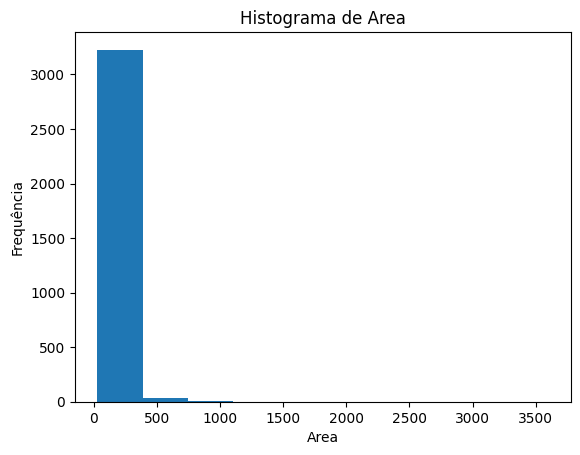

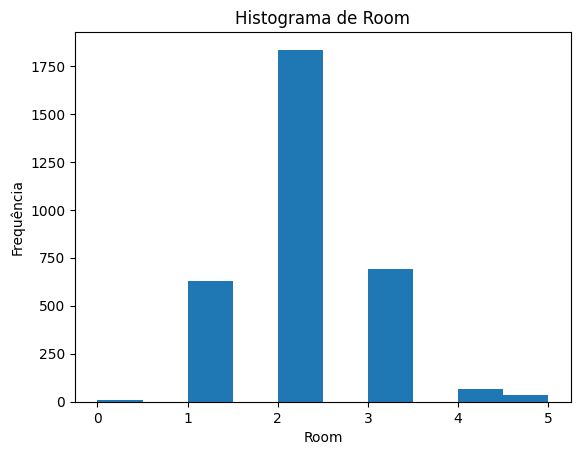

In [18]:
for name in numerical_feature:
  if name!= 'Price(USD)':
    plt.hist(df[name])
    plt.xlabel(name)
    plt.ylabel('Frequência')
    plt.title(f"Histograma de {name}")
    plt.show()

#Boxplot

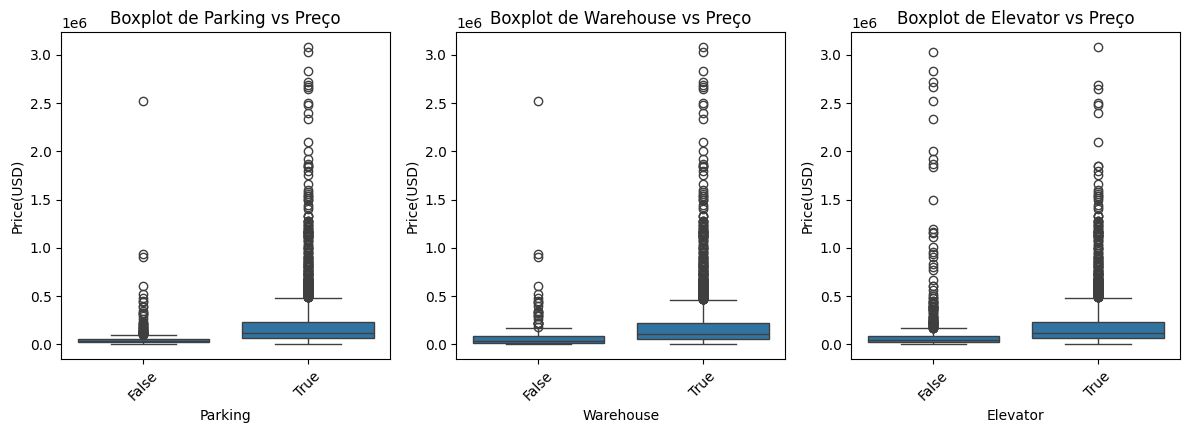

In [19]:
plt.figure(figsize=(12, 8))
for i, column in enumerate(boolean_feature):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=column, y='Price(USD)', data=df)
    plt.title(f'Boxplot de {column} vs Preço')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Scatter Plot

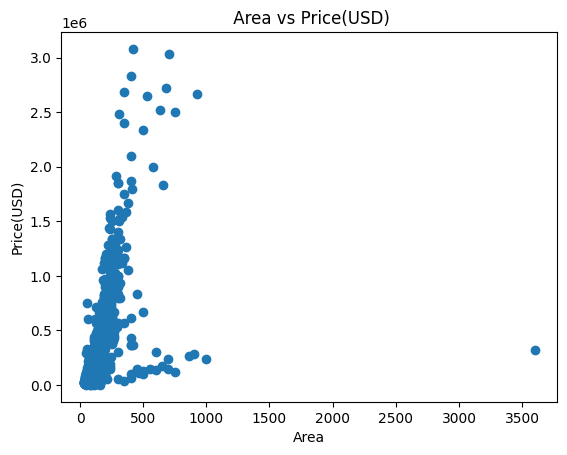

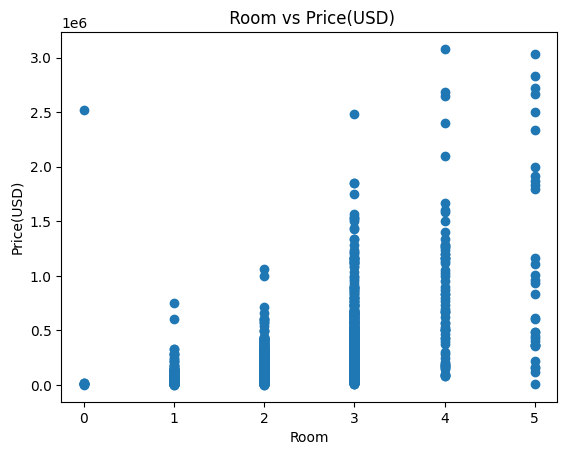

In [20]:
for name in ['Area', 'Room']:
  plt.scatter(df[name], df['Price(USD)'])
  plt.xlabel(name)
  plt.ylabel('Price(USD)')
  plt.title(f" {name} vs Price(USD)")
  plt.show()

# Identificação e Tratamento dos Outliers

In [21]:
def calculo_interquartil(data, name_columns):
  Q1 = data[name_columns].quantile(0.25)
  Q3 = data[name_columns].quantile(0.75)
  IQR = Q3 - Q1
  limite_inferior = Q1 - 1.5 * IQR
  limite_superior = Q3 + 1.5 * IQR
  if name_columns in ["Area", "Price(USD)"]: #Ajuste para as colunas que não podem ser negativas
    limite_inferior = max(0, limite_inferior)
  return limite_inferior, limite_superior

In [22]:
area_minimo, area_maximo = calculo_interquartil(df, 'Area')
preco_minimo, preco_maximo = calculo_interquartil(df, 'Price(USD)')
room_minimo, room_maximo = calculo_interquartil(df, 'Room')

In [23]:
df_clean = df[(df['Area'] > area_minimo) & (df['Area'] <= area_maximo) &
              (df['Price(USD)'] > preco_minimo) & (df['Price(USD)'] <= preco_maximo)]

Quantidade de valores eliminados

In [24]:
(df.shape[0] - df_clean.shape[0])

336

In [25]:
df = df_clean

In [26]:
df.drop('Address', axis = 1).skew()

Area          0.676762
Room          0.171293
Parking      -1.784833
Warehouse    -2.887243
Elevator     -1.388578
Price(USD)    1.297795
dtype: float64

#Feature Engineering

Criação de uma feature denominada 'Area_Size' para categorização dos tamanhos das casas dentro de intervalos específicos.

In [27]:
percentile_area_25 = df['Area'].quantile(0.25)
percentile_area_50 = df['Area'].quantile(0.5) # Mediana
percentile_area_75 = df['Area'].quantile(0.75)

In [28]:
def categorize_area(area):
  if area <= percentile_area_25:
    return 'Small House'
  elif percentile_area_25 < area <= percentile_area_50:
    return 'Medium House'
  elif percentile_area_50 < area <= percentile_area_75:
    return 'Large House'
  else:
    return 'Very large House'

In [29]:
df['Area_Size'] = df['Area'].apply(categorize_area)

In [30]:
df['Area_Size'].value_counts()

Area_Size
Large House         778
Small House         759
Medium House        710
Very large House    684
Name: count, dtype: int64

Visulizando a nova feature 'Area_Size'

<ipython-input-31-c2941a69037f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Area_Size", data=df, palette='viridis')


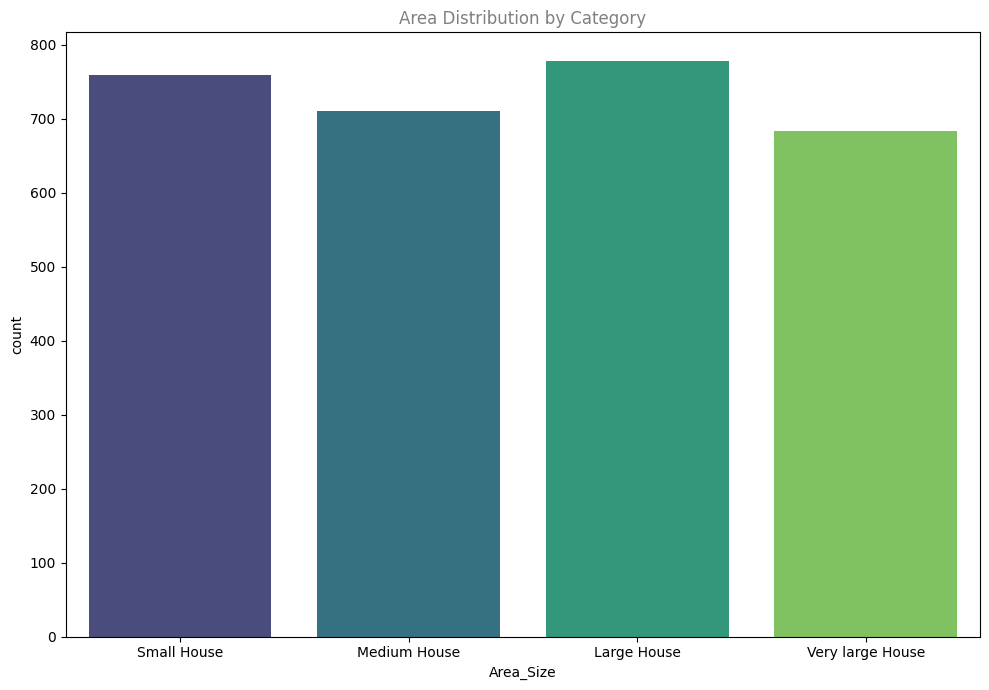

In [31]:
# Visualizando a nova distribuição
plt.figure(figsize=(10,7))
sns.countplot(x="Area_Size", data=df, palette='viridis')
plt.title("Area Distribution by Category", color='gray')
plt.tight_layout()
plt.show()

In [32]:
percentile_price_25 = df['Price(USD)'].quantile(0.25)
percentile_price_50 = df['Price(USD)'].quantile(0.5)
percentile_price_75 = df['Price(USD)'].quantile(0.75)

In [33]:
def categorize_price(price):
  if price <= percentile_price_25:
    return 'Low Price'
  elif percentile_price_25 < price <= percentile_price_50:
    return 'Medium Price'
  elif percentile_price_50 < price <= percentile_price_75:
    return 'High Price'
  else:
    return 'Very high Price'

In [34]:
df['Price_Level'] = df['Price(USD)'].apply(categorize_price)

In [35]:
df['Price_Level'].value_counts()

Price_Level
Medium Price       736
Low Price          734
Very high Price    733
High Price         728
Name: count, dtype: int64

<ipython-input-36-6bfdd0a530e4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Price_Level", data=df, palette='viridis')


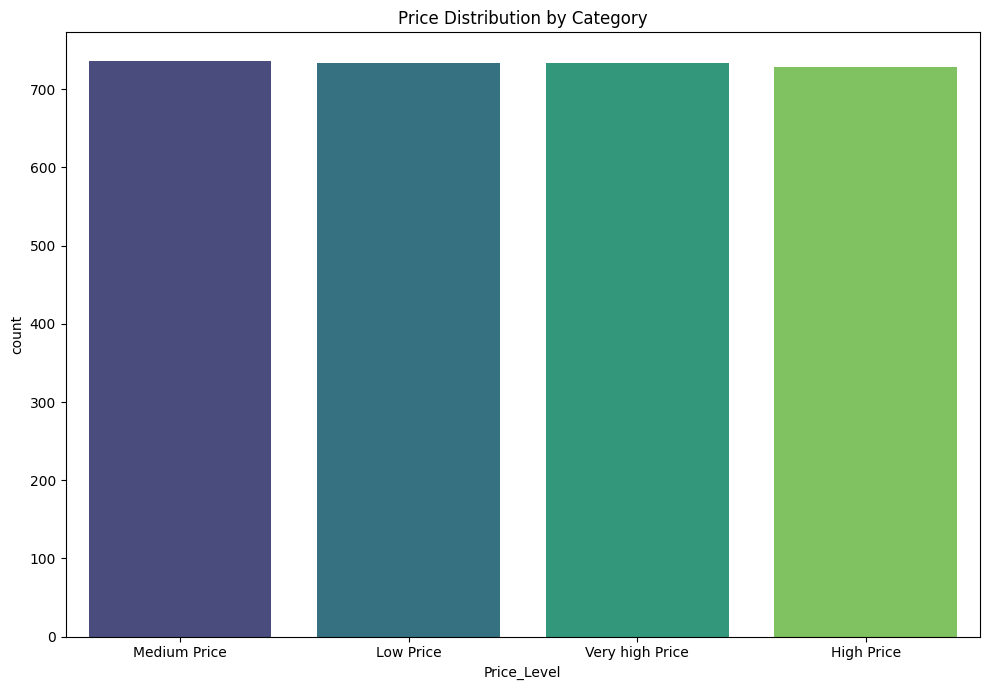

In [36]:
# Visualizando a nova distribuição
plt.figure(figsize=(10,7))
sns.countplot(x="Price_Level", data=df, palette='viridis')
plt.title("Price Distribution by Category")
plt.tight_layout()
plt.show()

#Visualização das features categóricas

Quais são os 10 endereços com maior frequência?

In [37]:
addresses_frequency = df['Address'].value_counts().head(10)

<ipython-input-38-55229f522ba8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=addresses_frequency.values , y=addresses_frequency.index, palette='viridis')


Text(0, 0.5, 'Endereços')

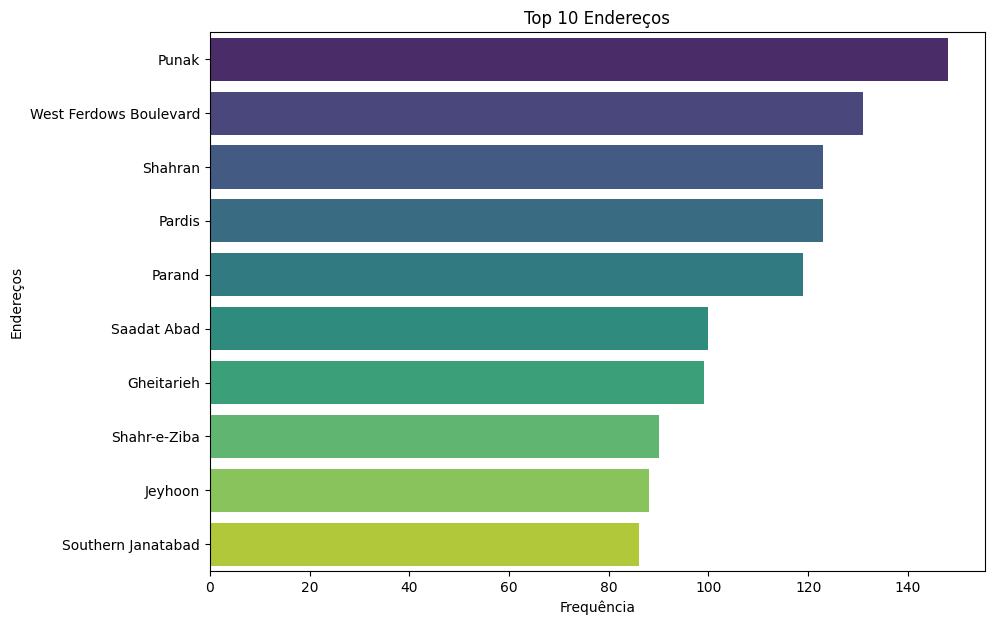

In [38]:
plt.figure(figsize=(10,7))
sns.barplot(x=addresses_frequency.values , y=addresses_frequency.index, palette='viridis')
plt.title('Top 10 Endereços')
plt.xlabel('Frequência')
plt.ylabel("Endereços")

In [39]:
boolean_feature

Index(['Parking', 'Warehouse', 'Elevator'], dtype='object')

<ipython-input-40-7728a7d6b2b1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[index], x=name, data=df, palette='Set2')
<ipython-input-40-7728a7d6b2b1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[index], x=name, data=df, palette='Set2')
<ipython-input-40-7728a7d6b2b1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[index], x=name, data=df, palette='Set2')


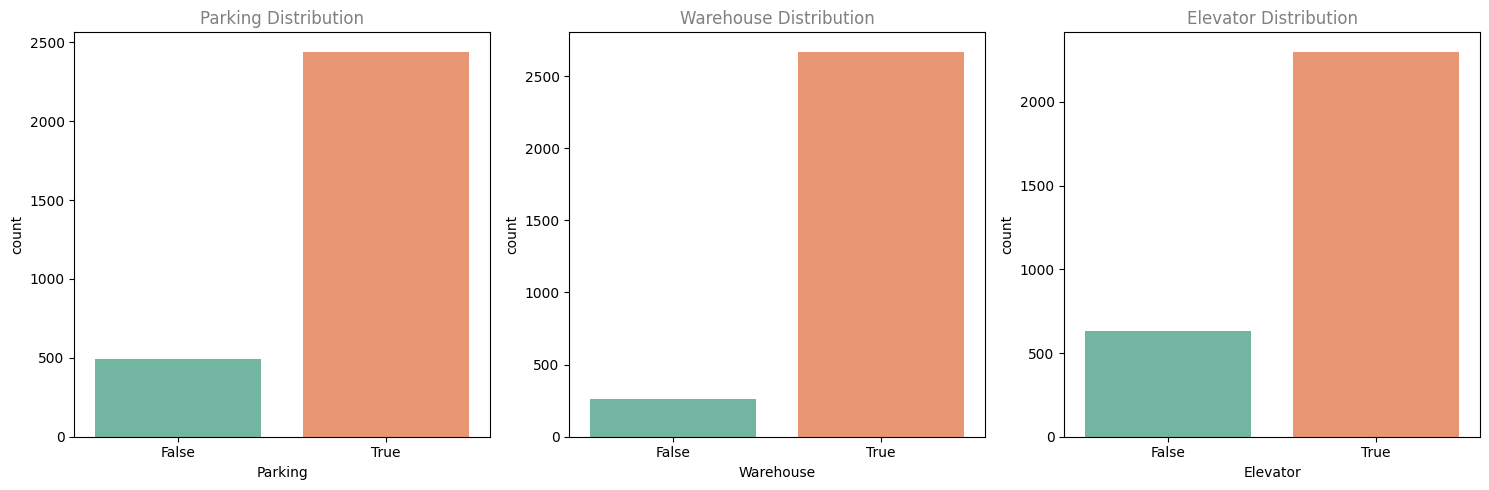

In [40]:
# Criar subplots, ajustando o tamanho da figura conforme o número de gráficos
fig, axes = plt.subplots(nrows=1, ncols=len(boolean_feature), figsize=(15, 5))
for index, name in enumerate(boolean_feature):
    sns.countplot(ax=axes[index], x=name, data=df, palette='Set2')
    axes[index].set_title(f'{name} Distribution', color='gray')

plt.tight_layout()
plt.show()

# Conversão para binários as colunas booleanas (Parking, Warehouse, Elevator)

In [41]:
df[boolean_feature] = df[boolean_feature].astype(int)

In [42]:
df

,Area,Room,Parking,Warehouse,Elevator,Address,Price(USD),Area_Size,Price_Level
0,63,1,1,1,1,Shahran,61666.67,Small House,Medium Price
1,60,1,1,1,1,Shahran,61666.67,Small House,Medium Price
2,79,2,1,1,1,Pardis,18333.33,Medium House,Low Price
3,95,2,1,1,1,Shahrake Qods,30083.33,Large House,Low Price
4,123,2,1,1,1,Shahrake Gharb,233333.33,Very large House,Very high Price
...,...,...,...,...,...,...,...,...,...
3473,63,1,1,1,0,Feiz Garden,63000.00,Small House,Medium Price
3474,86,2,1,1,1,Southern Janatabad,116666.67,Medium House,High Price
3475,83,2,1,1,1,Niavaran,226666.67,Medium House,Very high Price
3477,105,2,1,1,1,Dorous,186666.67,Large House,Very high Price


In [43]:
df.dropna(inplace = True)

In [44]:
df

,Area,Room,Parking,Warehouse,Elevator,Address,Price(USD),Area_Size,Price_Level
0,63,1,1,1,1,Shahran,61666.67,Small House,Medium Price
1,60,1,1,1,1,Shahran,61666.67,Small House,Medium Price
2,79,2,1,1,1,Pardis,18333.33,Medium House,Low Price
3,95,2,1,1,1,Shahrake Qods,30083.33,Large House,Low Price
4,123,2,1,1,1,Shahrake Gharb,233333.33,Very large House,Very high Price
...,...,...,...,...,...,...,...,...,...
3473,63,1,1,1,0,Feiz Garden,63000.00,Small House,Medium Price
3474,86,2,1,1,1,Southern Janatabad,116666.67,Medium House,High Price
3475,83,2,1,1,1,Niavaran,226666.67,Medium House,Very high Price
3477,105,2,1,1,1,Dorous,186666.67,Large House,Very high Price


#Codificação das features independentes categóricas para numérica

In [45]:
df = pd.get_dummies(df , ['Address', 'Area_Size', 'Price_Level'], drop_first = True)

In [46]:
df

,Area,Room,Parking,Warehouse,Elevator,Price(USD),Address_Abbasabad,Address_Abuzar,Address_Afsarieh,Address_Ahang,...,Address_Zafar,Address_Zaferanieh,Address_Zargandeh,Address_Zibadasht,Area_Size_Medium House,Area_Size_Small House,Area_Size_Very large House,Price_Level_Low Price,Price_Level_Medium Price,Price_Level_Very high Price
0,63,1,1,1,1,61666.67,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
1,60,1,1,1,1,61666.67,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
2,79,2,1,1,1,18333.33,False,False,False,False,...,False,False,False,False,True,False,False,True,False,False
3,95,2,1,1,1,30083.33,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,123,2,1,1,1,233333.33,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3473,63,1,1,1,0,63000.00,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
3474,86,2,1,1,1,116666.67,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3475,83,2,1,1,1,226666.67,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
3477,105,2,1,1,1,186666.67,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


# VIF (Variance Inflation Factor)

In [47]:
def calculate_vif(data):
  features = data.select_dtypes(include = [np.number])
  vif = pd.DataFrame()
  vif['Features'] = features.columns
  vif['VIF'] = [variance_inflation_factor(features.values, i) for i in range(len(features.columns))]
  return vif

#Verificar a correlação entre as variáveis (Matriz de Correlação)

In [48]:
# Cálculo da matriz de correlação
def calculate_correlation_matrix(data):
  matriz_correlacao = data.select_dtypes(include = [np.number]).corr()
  # Create a heatmap of the correlation matrix
  plt.figure(figsize=(12, 8))
  sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm')
  plt.title("Matriz de Correlação")
  plt.show()
  return

# Antes das mudanças

In [49]:
vif_antes = calculate_vif(df)
print(vif_antes)

     Features        VIF
0        Area  33.064183
1        Room  24.954390
2     Parking   8.951417
3   Warehouse   9.519395
4    Elevator   5.936919
5  Price(USD)   4.423944


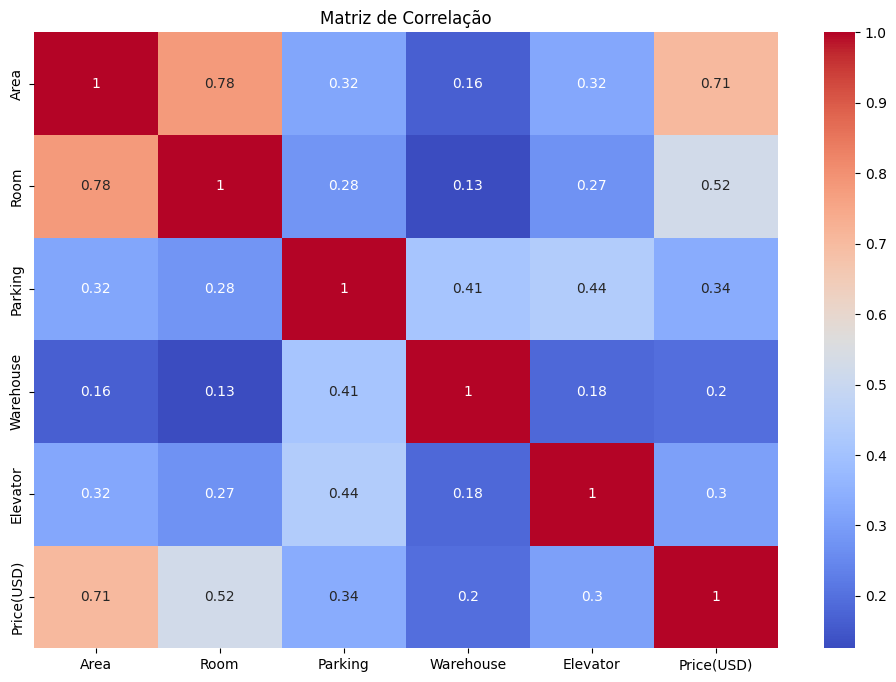

In [50]:
calculate_correlation_matrix(df)

# Depois das mudanças

     Features        VIF
0        Area  12.798524
1     Parking   8.916420
2   Warehouse   9.332647
3    Elevator   5.919103
4  Price(USD)   4.303246


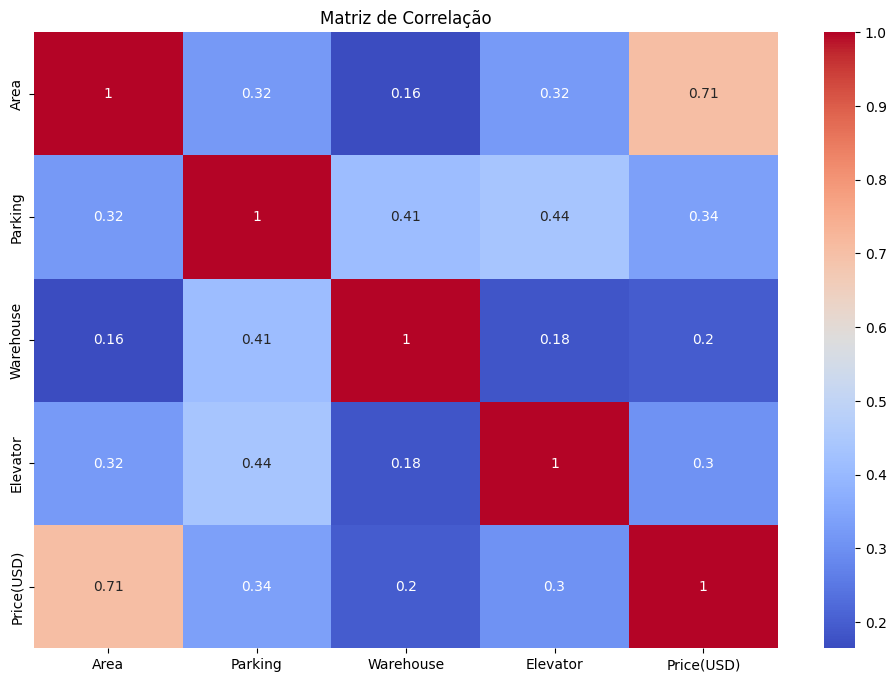

In [51]:
df_temp = df.drop('Room', axis = 1)
vif_depois = calculate_vif(df_temp)
print(vif_depois)
calculate_correlation_matrix(df_temp)

# Analisando a relação entre as features independentes e a variável target

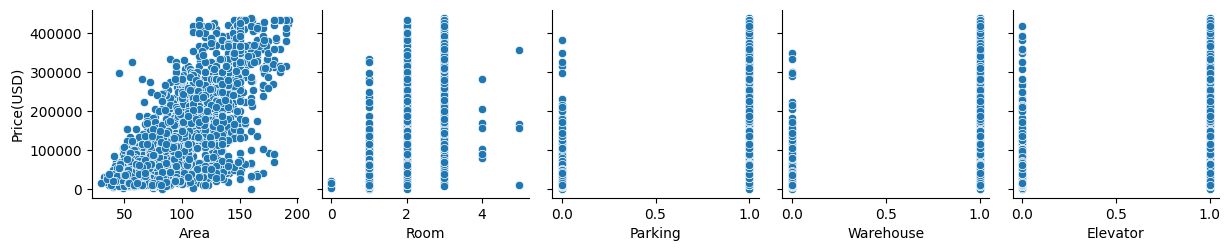

In [52]:
# Plotar a relação entre cada feature categórica transformada e a variável target
sns.pairplot(df, y_vars="Price(USD)", x_vars=["Area", "Room", "Parking", "Warehouse", "Elevator"])
plt.show()

# Normalização das features numéricas utilizando o MinMaxScaler.

Normalização das features Área e Room

In [53]:
X = df.drop(['Price(USD)'], axis = 1)
y = df['Price(USD)']

In [54]:
scaler = MinMaxScaler()
X[['Area', 'Room']] = scaler.fit_transform(X[['Area', 'Room']])

# Utilização do PCA (Principal Component Analysis)

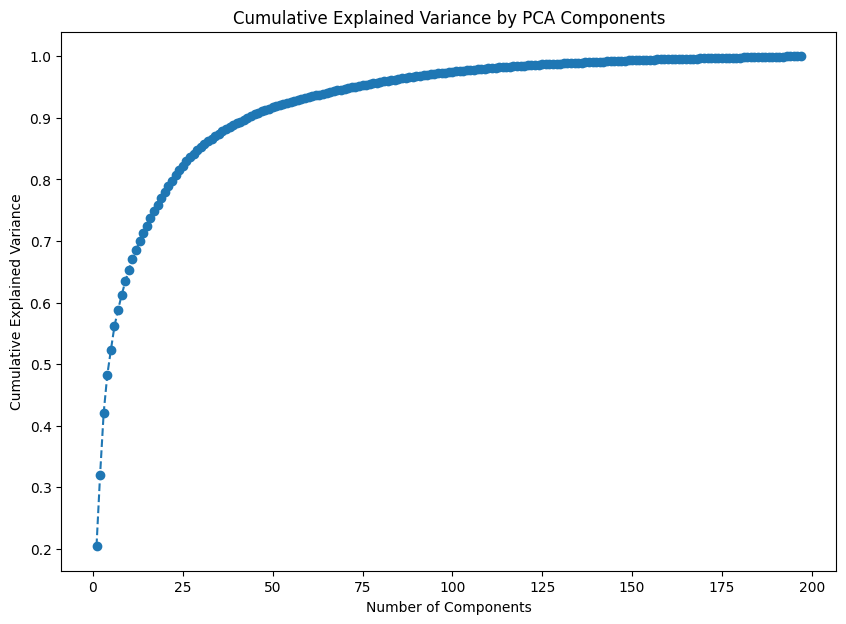

In [55]:
# Aplicar PCA
pca = PCA()
X_pca = pca.fit_transform(X)

# Plotar a variância explicada por cada componente principal
plt.figure(figsize=(10, 7))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

# Selecionar o número de componentes que explicam 95% da variância
n_components = next(i for i, cumulative_variance in enumerate(pca.explained_variance_ratio_.cumsum()) if cumulative_variance > 0.95) + 1


In [56]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size = 0.2, random_state = 42)

# Predições dos Modelos

In [57]:
# Inicializar dicionário para armazenar os resultados
model_results = {
    "Model_Name": [],
    "Train_Score": [],
    "Test_Score": [],
    "MSE_Score": [],
    "RMSE_Score": [],
    "Time_Score": []
}

In [58]:
def model_prediction(model, X_train, y_train, X_test, y_test):
    start_time = time.time()

    # Treinamento do modelo
    model.fit(X_train, y_train)

    # Previsão
    y_prediction = model.predict(X_test)

    # Avaliação do modelo
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    mse_score = mean_squared_error(y_test, y_prediction)
    rmse_score = np.sqrt(mse_score)

    end_time = time.time()
    time_score = end_time - start_time

    # Obter o nome do modelo
    model_name = model.__class__.__name__

    # Armazenar resultados
    model_results["Model_Name"].append(model_name)
    model_results["Train_Score"].append(train_score)
    model_results["Test_Score"].append(test_score)
    model_results["MSE_Score"].append(mse_score)
    model_results["RMSE_Score"].append(rmse_score)
    model_results["Time_Score"].append(time_score)

    # Exibir resultados
    print(f'Name of the model: {model_name}')
    print('----' * 10)
    print(f'R2 score for Training: {train_score:.4f}')
    print(f'R2 score for Testing: {test_score:.4f}')
    print("----" * 10)
    print(f'The MSE score is: {mse_score:.4f}')
    print(f'The RMSE score is: {rmse_score:.4f}')
    print("----" * 10)
    print(f'Time score is: {time_score:.4f} seconds')

    return

# Regressão Linear

In [59]:
model_prediction(LinearRegression(), X_train, y_train, X_test, y_test)

Name of the model: LinearRegression
----------------------------------------
R2 score for Training: 0.9163
R2 score for Testing: -3121066022243404873728.0000
----------------------------------------
The MSE score is: 31204736170510759548805149884416.0000
The RMSE score is: 5586119956688252.0000
----------------------------------------
Time score is: 0.0510 seconds


# Random Forest Regressor

In [60]:
model_prediction(RandomForestRegressor(), X_train, y_train, X_test, y_test)

Name of the model: RandomForestRegressor
----------------------------------------
R2 score for Training: 0.9852
R2 score for Testing: 0.9211
----------------------------------------
The MSE score is: 789152072.1322
The RMSE score is: 28091.8506
----------------------------------------
Time score is: 26.2712 seconds


# Linear Regression with Ridge

In [61]:
model_prediction(Ridge(alpha=1.0), X_train, y_train, X_test, y_test)

Name of the model: Ridge
----------------------------------------
R2 score for Training: 0.9140
R2 score for Testing: 0.8927
----------------------------------------
The MSE score is: 1072353614.2741
The RMSE score is: 32746.8107
----------------------------------------
Time score is: 0.0162 seconds


# Linear Regression with Lasso

In [62]:
model_prediction(Lasso(alpha=0.1), X_train, y_train, X_test, y_test)

Name of the model: Lasso
----------------------------------------
R2 score for Training: 0.9163
R2 score for Testing: 0.8952
----------------------------------------
The MSE score is: 1048226686.7003
The RMSE score is: 32376.3291
----------------------------------------
Time score is: 0.2398 seconds


# Gradient Boost Regressor

In [63]:
model_prediction(GradientBoostingRegressor(random_state=42), X_train, y_train, X_test, y_test)

Name of the model: GradientBoostingRegressor
----------------------------------------
R2 score for Training: 0.9606
R2 score for Testing: 0.9210
----------------------------------------
The MSE score is: 789398103.9778
The RMSE score is: 28096.2294
----------------------------------------
Time score is: 12.9571 seconds


# XGB Regressor

In [64]:
model_prediction(xgb.XGBRegressor(objective='reg:squarederror', random_state=42), X_train, y_train, X_test, y_test)

Name of the model: XGBRegressor
----------------------------------------
R2 score for Training: 0.9939
R2 score for Testing: 0.9128
----------------------------------------
The MSE score is: 872135508.2724
The RMSE score is: 29531.9405
----------------------------------------
Time score is: 6.3914 seconds


# Resumo dos resultados dos modelos preditivos

In [65]:
results_model_df = pd.DataFrame(model_results)
results_model_df

,Model_Name,Train_Score,Test_Score,MSE_Score,RMSE_Score,Time_Score
0,LinearRegression,0.916319,-3.121066e+21,3.120474e+31,5.586120e+15,0.051020
1,RandomForestRegressor,0.985222,9.210698e-01,7.891521e+08,2.809185e+04,26.271216
2,Ridge,0.914017,8.927443e-01,1.072354e+09,3.274681e+04,0.016238
3,Lasso,0.916319,8.951574e-01,1.048227e+09,3.237633e+04,0.239795
4,GradientBoostingRegressor,0.960608,9.210452e-01,7.893981e+08,2.809623e+04,12.957092
5,XGBRegressor,0.993910,9.127699e-01,8.721355e+08,2.953194e+04,6.391428


# Visualização das métricas dos diferentes modelos preditivos

In [66]:
# Configuração do estilo do seaborn
sns.set(style="whitegrid")

<ipython-input-67-6699ecc2e975>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model_Name", y="Test_Score", data=results_model_df, palette='Set2')


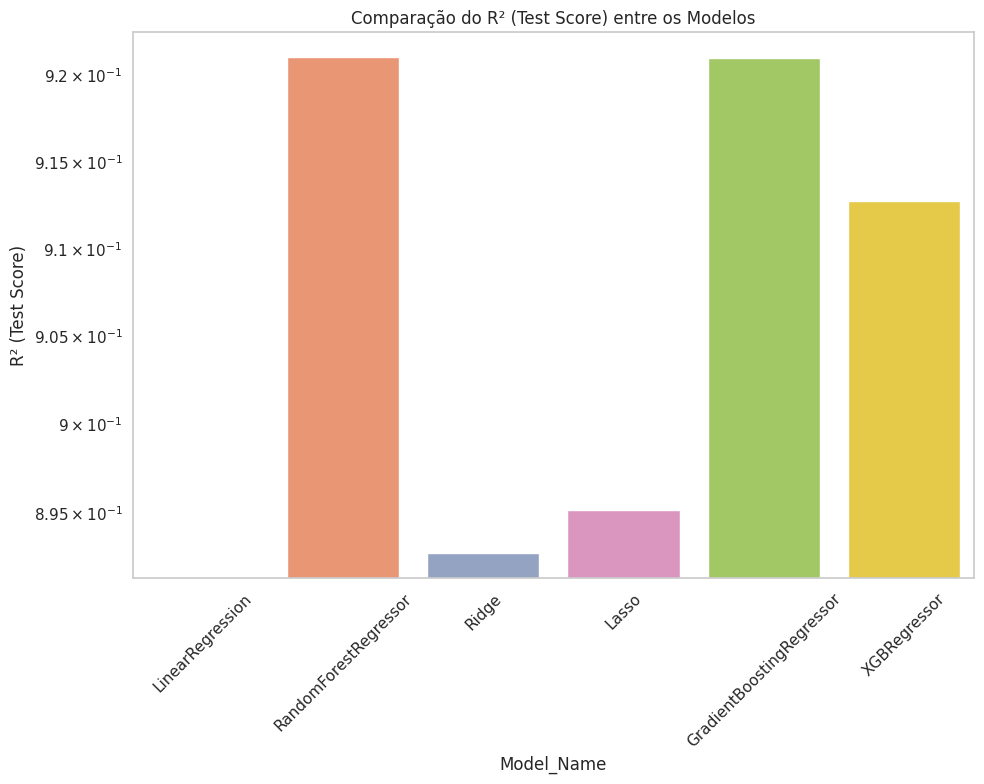

In [67]:
# Gráfico de Barras do R² (Test Score)
plt.figure(figsize=(10, 8))
sns.barplot(x="Model_Name", y="Test_Score", data=results_model_df, palette='Set2')
plt.title('Comparação do R² (Test Score) entre os Modelos')
plt.ylabel('R² (Test Score)')
plt.yscale('log')  # Usar escala logarítmica
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-68-0fcf0339d419>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model_Name", y="MSE_Score", data=results_model_df, palette='Set2')


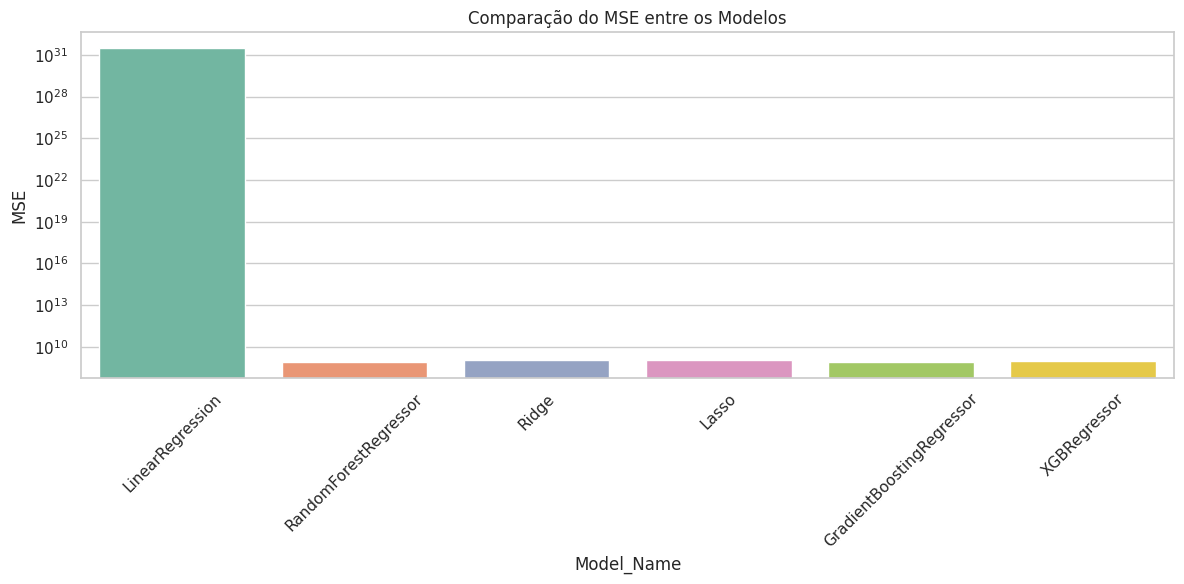

In [68]:
# Gráfico de Barras do MSE
plt.figure(figsize=(12, 6))
sns.barplot(x="Model_Name", y="MSE_Score", data=results_model_df, palette='Set2')
plt.title('Comparação do MSE entre os Modelos')
plt.ylabel('MSE')
plt.yscale('log')  # Escala logarítmica para melhor visualização
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-69-faab8f8c01e4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model_Name", y="RMSE_Score", data=results_model_df, palette='Set2')


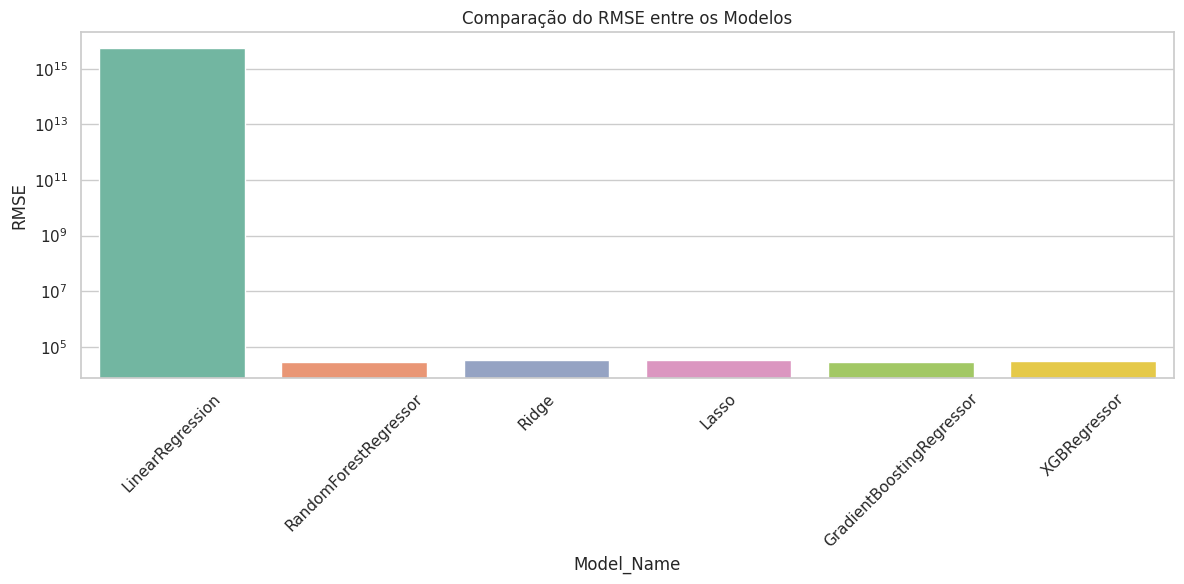

In [69]:
# Gráfico de Barras do RMSE
plt.figure(figsize=(12, 6))
sns.barplot(x="Model_Name", y="RMSE_Score", data=results_model_df, palette='Set2')
plt.title('Comparação do RMSE entre os Modelos')
plt.ylabel('RMSE')
plt.yscale('log')  # Usar escala logarítmica
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-70-66bee1e168fd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model_Name", y="Time_Score", data=results_model_df, palette='Set2')


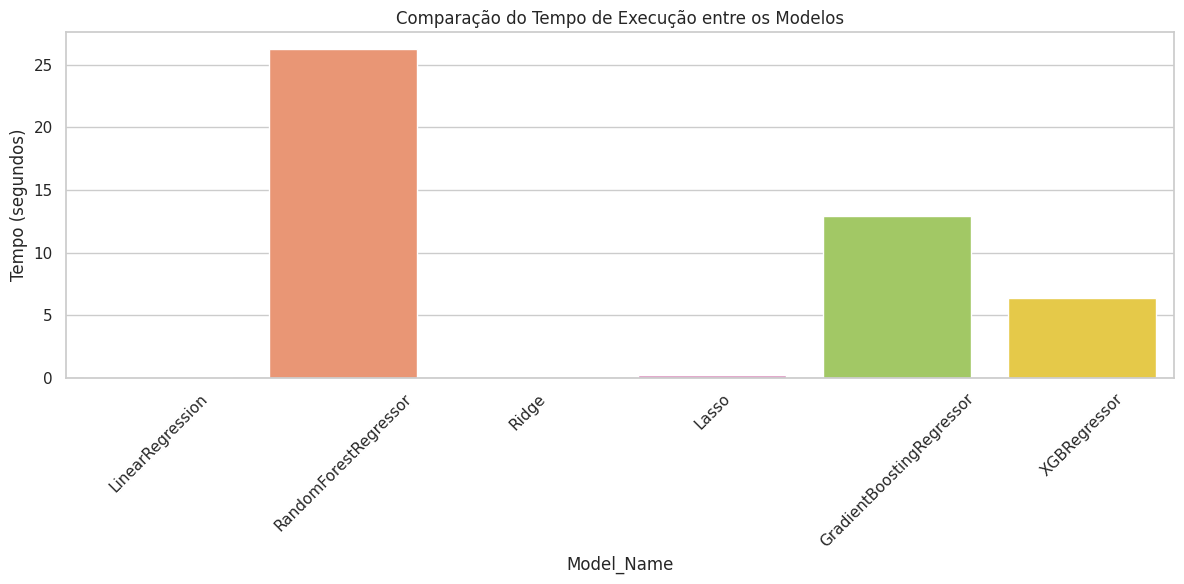

In [70]:
# Gráfico de Barras do Tempo de Execução
plt.figure(figsize=(12, 6))
sns.barplot(x="Model_Name", y="Time_Score", data=results_model_df, palette='Set2')
plt.title('Comparação do Tempo de Execução entre os Modelos')
plt.ylabel('Tempo (segundos)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()